Importing libraries and loading data

In [44]:
!pip install yellowbrick.cluster
# not identified on jupiter notebook

  ERROR: Could not find a version that satisfies the requirement yellowbrick.cluster (from versions: none)
ERROR: No matching distribution found for yellowbrick.cluster


In [163]:
#Import packages
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import seaborn as sns
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score

In [113]:
df = pd.read_csv('Mall_Customers.csv')

In [114]:
data = pd.DataFrame(df)

Data Mining - Christine Style

In [228]:
#size of dataframe
data.shape

(200, 4)

In [116]:
#data types
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [117]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [118]:
#Removing CustomerID Column
data = data.drop(["CustomerID"], axis=1)

In [119]:
#Rename columns
data.columns = ['genre', 'age', 'revenus', 'depenses']

In [120]:
#number of distinct value by column
data.nunique()

genre        2
age         51
revenus     64
depenses    84
dtype: int64

In [121]:
#Checking Na values
data.isna().sum()

genre       0
age         0
revenus     0
depenses    0
dtype: int64

In [122]:
data.columns

Index(['genre', 'age', 'revenus', 'depenses'], dtype='object')

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

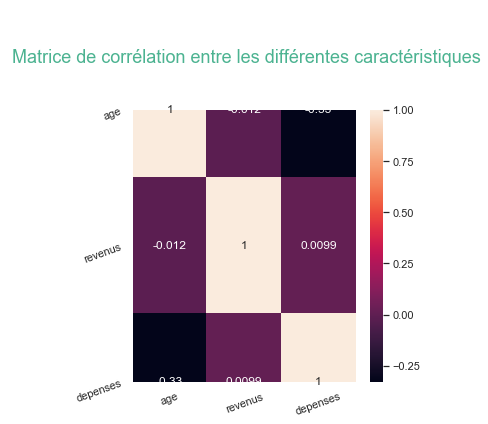

In [123]:
#Correlation Matrix
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)
plt.title("\n\n Matrice de corrélation entre les différentes caractéristiques\n\n", fontsize=18, color='#4CB391')
plt.xticks(rotation=20)
plt.yticks(rotation=20)

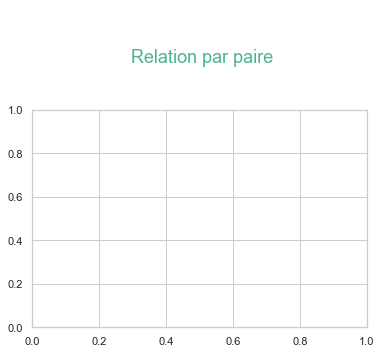

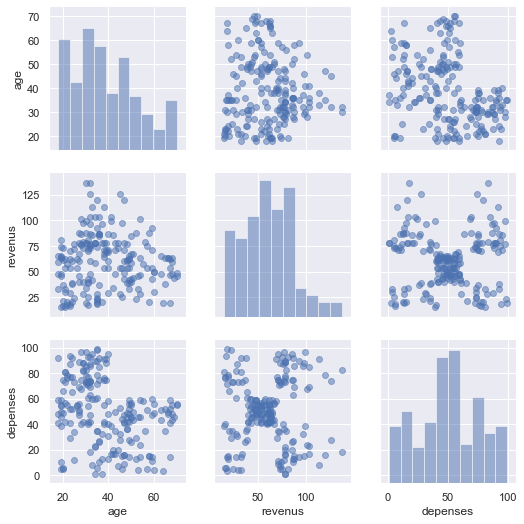

In [124]:
plt.title("\n\n Relation par paire\n\n", fontsize=18, color='#4CB391')
sns.set(style="darkgrid")
g = sns.PairGrid(data)
g.map_diag(plt.hist, alpha=.5)
g.map_offdiag(plt.scatter, alpha=.5)

Visualisation

Text(0.5, 1.0, '\nVision + détaillée : répartition par âge\n')

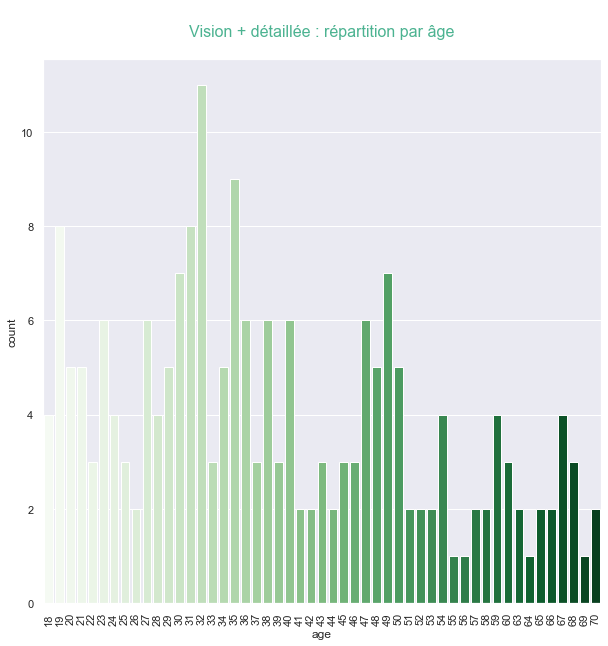

In [126]:
plt.figure(figsize=(10,10))
test2 = sns.countplot(data=data, x='age', palette="Greens")
plt.xticks(rotation= 90)
plt.title("\nVision + détaillée : répartition par âge\n", fontsize=16, color='#4CB391')

Text(0.5, 1.0, '\nVision + détaillée : répartition par genre\n')

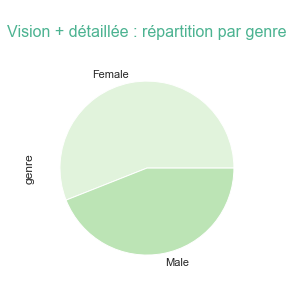

In [127]:
sns.set(palette="Greens")
data.genre.value_counts().plot(kind='pie')
plt.title("\nVision + détaillée : répartition par genre\n", fontsize=16, color='#4CB391')

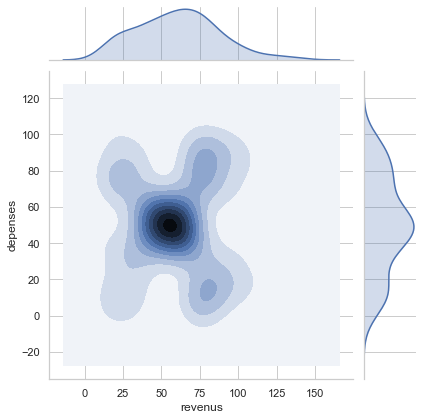

In [129]:
sns.set(style="whitegrid")
sns.jointplot(x="revenus", y="depenses", data=data, kind="kde")

Test 1 : 3 cluster

In [188]:
#Encoding data
x = pd.get_dummies(data, columns = ["genre"])

In [189]:
#Cluster K-means with k = 3
model1=KMeans(n_clusters=3)
y = model1.fit(x)

In [190]:
#Affiche la répartition par clustering fait par l'algo
print(model1.labels_)
labels = model1.labels_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [191]:
davies_bouldin_score(x, labels)

0.8753230420594506

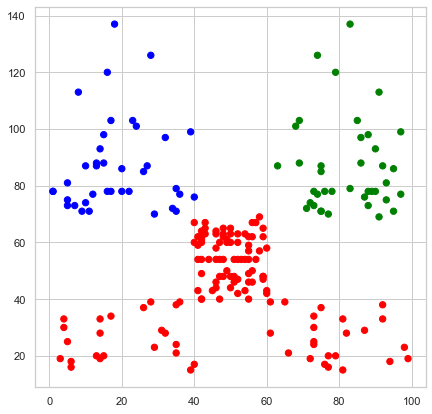

In [192]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,7))
colormap=np.array(['Red','green','blue'])
plt.scatter(x.depenses, x.revenus,c=colormap[model1.labels_],s=40)

In [193]:
model1.score(x)

-143440.43314900773

In [194]:
# cluster proximity evaluation 
# The weaker it is, better it is
davies_bouldin_score(x, labels)

0.8753230420594506

Test 2 : 5 Clusters

In [195]:
#Cluster K-means with k = 5
model2=KMeans(n_clusters=5)
y = model2.fit(x)

In [196]:
labels2 = model2.labels_
print(labels2)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


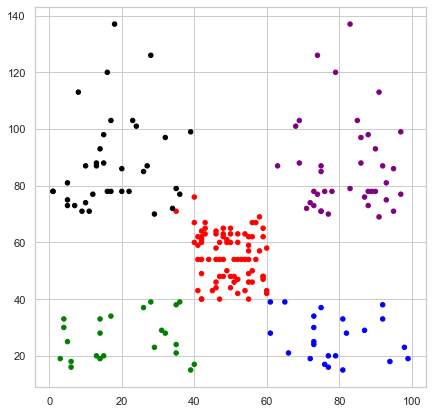

In [197]:
plt.figure(figsize=(7,7))
colormap=np.array(['Red','green','blue', 'black', 'purple'])
plt.scatter(x.depenses, x.revenus,c=colormap[labels2],s=20)

In [198]:
# cluster proximity evaluation 
# The weaker it is, better it is
labels2 = model2.labels_
davies_bouldin_score(x, labels2)

0.8226404727173853

In [199]:
model2.score(x)

-75448.45165554185

The Elbow method

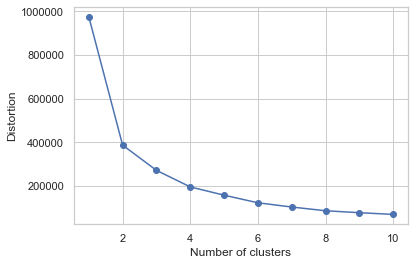

In [200]:
# Elbow method : calculate distortion for a range of number of cluster
# Calculation to minimize distorsion
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_dummies)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Test 3 : 4 clusters

In [202]:
#Cluster K-means with k = 4
model3=KMeans(n_clusters=4)
y = model3.fit(x)

In [203]:
labels3 = model3.labels_
print(labels3)

[2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


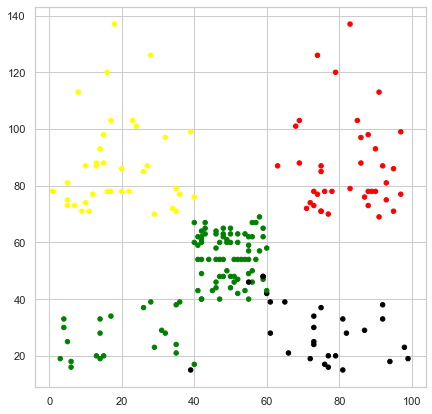

In [207]:
plt.figure(figsize=(7,7))
colormap=np.array(['Red','green', 'black', 'yellow'])
plt.scatter(x.depenses, x.revenus,c=colormap[labels3],s=20)

In [211]:
#Centroid Proximity
davies_bouldin_score(x, labels3)

0.8921475520479039

Test 4 : 6 clusters

In [212]:
#Cluster K-means with k = 6
model4=KMeans(n_clusters=6)
y = model4.fit(x)

In [213]:
labels4 = model4.labels_
print(labels4)

[3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 4 5 4 2 3 5 4 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 4 4 4 2 4 4 2 2 4 4 4 4
 4 2 4 2 2 4 4 2 4 4 2 4 4 2 2 4 4 2 4 2 2 2 4 2 4 2 2 4 4 2 4 2 4 4 4 4 4
 2 2 2 2 2 4 4 4 4 2 2 2 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


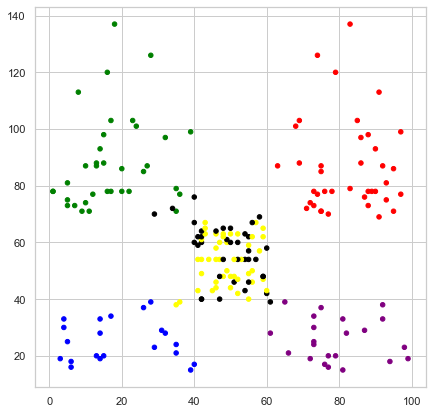

In [215]:
plt.figure(figsize=(7,7))
colormap=np.array(['Red','green', 'black','blue', 'yellow','purple'])
plt.scatter(x.depenses, x.revenus,c=colormap[labels4],s=20)

In [216]:
#Centroid Proximity
davies_bouldin_score(x, labels3)

0.8921475520479039

For

k = 3 , indice = 0.875

k = 4 , indice = 0.892

k = 5 , indice = 0.822

k = 6 , indice = 0.892

Methodology for building clusters on a dataset / only computing part

In [217]:
modelA=KMeans(n_clusters=5, init='random', random_state=42, max_iter=10)
modelA.fit(x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [218]:
modelA.labels_

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [219]:
labels = modelA.labels_
davies_bouldin_score(x, labels)

0.8277778521330488

In [220]:
modelA.score(x)

-75591.70279006513

Test Mini Batch : Improve capacity to compute by batch treatment of the dataset involved but also a drop of precision

In [221]:
from sklearn.cluster import MiniBatchKMeans

In [223]:
modelB=KMeans(n_clusters=5, init='random', random_state=42, max_iter=10)
modelB.fit(x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [225]:
modelB.labels_

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [226]:
labels = modelB.labels_
davies_bouldin_score(X, labels)

0.8277778521330488

In [227]:
modelB.score(X)

-75591.70279006513

Test Mini Batch : 

In [232]:
modelC=KMeans(n_clusters=5, init='k-means++', random_state=42, max_iter=10)
modelC.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [233]:
modelC.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [234]:
labels = modelC.labels_
davies_bouldin_score(X, labels)

0.8200252029979724

Text(0.5, 1.0, 'K-means clustering ')

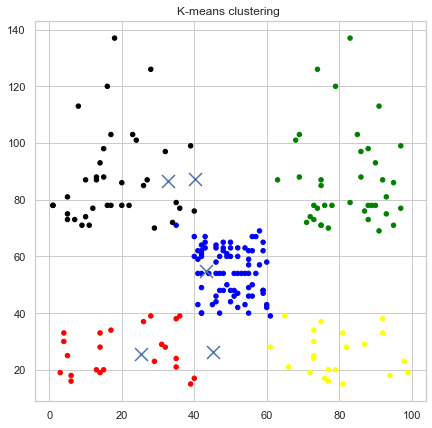

In [259]:

plt.figure(figsize=(7,7))
colormap=np.array(['Red','green', 'black','blue', 'yellow'])
plt.scatter(x.depenses, x.revenus,c=colormap[labels],s=20)

#plotting centroids   -->  ??
centroids = modelC.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
plt.title('K-means clustering ')